# Import thư viện

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import matplotlib.pyplot as plt

import time
import pandas as pd

## Import class SVM

In [ ]:
from svm import *
from hog_class import *
from functions import *

In [ ]:
n_test = [100, 200, 300, 400, 500]
link_cat = './PetImages/Cat/**'
link_dog = './PetImages/Dog/**'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/LTSSUD/Data/archive.zip;
print("Finished!")

# So sánh khi không có HOG

In [ ]:
acc1_no_hog = []
acc2_no_hog = []
acc3_no_hog = []
acc4_no_hog = []
acc5_no_hog = []
time1_no_hog = []
time2_no_hog = []
time3_no_hog = []
time4_no_hog = []
time5_no_hog = []

In [ ]:
for n in n_test:
    X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n)
    
    x_train = np.array([x.flatten() for x in X_train])
    x_test = np.array([x.flatten() for x in X_test])
    
    y_train_sklearn = np.array([str(y) for y in y_train])
    y_test_sklearn = np.array([str(y) for y in y_test])
    
    start = time.time()
    svm = SVM_Old()
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time1_no_hog.append(end-start)
    acc1_no_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVM_New(kernel = 'linear')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time2_no_hog.append(end-start)
    acc2_no_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_New(kernel = 'rbf')
    svm.fit(x_train, y_train)
    pred = svm.predict(x_test)
    end = time.time()
    time3_no_hog.append(end-start)
    acc3_no_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVC(kernel = 'linear', shrinking = False)
    svm.fit(x_train, y_train_sklearn)
    pred = svm.predict(x_test)
    end = time.time()
    time4_no_hog.append(end-start)
    acc4_no_hog.append(accuracy_score(pred, y_test_sklearn))
    
    start = time.time()
    svm = SVC(kernel = 'rbf', shrinking = False)
    svm.fit(x_train, y_train_sklearn)
    pred = svm.predict(x_test)
    end = time.time()
    time5_no_hog.append(end-start)
    acc5_no_hog.append(accuracy_score(pred, y_test_sklearn))

## Plot kết quả

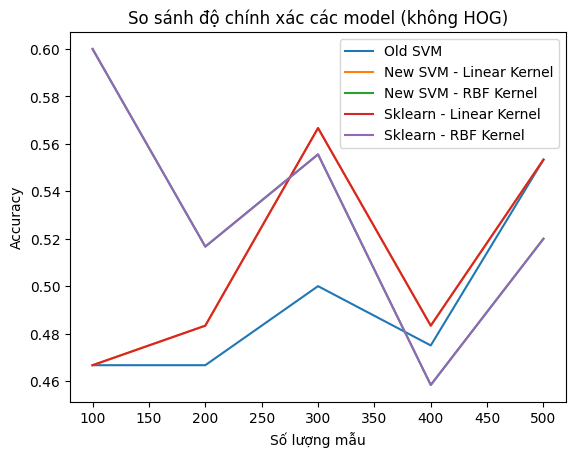

In [ ]:
plt.plot(n_test, acc1_no_hog, label = 'Old SVM')
plt.plot(n_test, acc2_no_hog, label = 'New SVM - Linear Kernel')
plt.plot(n_test, acc3_no_hog, label = 'New SVM - RBF Kernel')
plt.plot(n_test, acc4_no_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, acc5_no_hog, label = 'Sklearn - RBF Kernel')

plt.xlabel("Số lượng mẫu")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác các model (không HOG)")
plt.legend()
plt.show()

**Nhận xét**

SVM bản cũ có accuracy thấp hơn trong mọi trường hợp.

SVM mới có accuracy giống hoàn toàn với thư viện sklearn.

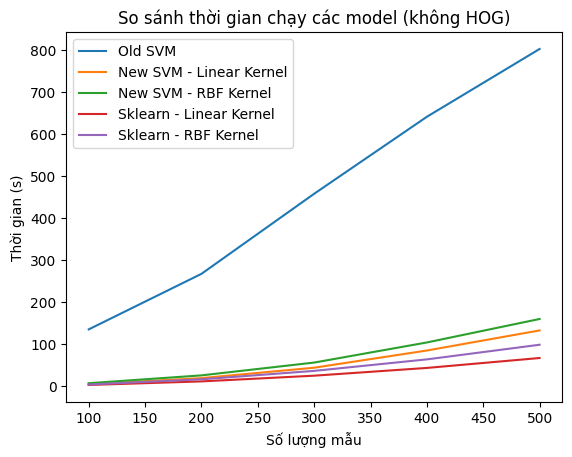

In [ ]:
plt.plot(n_test, time1_no_hog, label = 'Old SVM')
plt.plot(n_test, time2_no_hog, label = 'New SVM - Linear Kernel')
plt.plot(n_test, time3_no_hog, label = 'New SVM - RBF Kernel')
plt.plot(n_test, time4_no_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, time5_no_hog, label = 'Sklearn - RBF Kernel')

plt.xlabel("Số lượng mẫu")
plt.ylabel("Thời gian (s)")
plt.title("So sánh thời gian chạy các model (không HOG)")
plt.legend()
plt.show()

**Nhận xét**

SVM cũ có thời gian chạy lâu nhất.

Sklearn có thời gian chạy thấp nhất, nhưng không quá khác biệt so với SVM mới.

# So sánh khi có HOG

In [ ]:
blocksize = (2, 2)
cellsize = (8, 8)
nbin = 9
sbin = 40
threadperblock = (32, 32)
hog = HOG_CUDA_2(blocksize, cellsize, nbin, sbin, threadperblock)


acc1_hog = []
acc2_hog = []
acc3_hog = []
acc4_hog = []
acc5_hog = []
time1_hog = []
time2_hog = []
time3_hog = []
time4_hog = []
time5_hog = []

In [ ]:
for n in n_test:
    X_train, y_train, X_test, y_test = read_data(link_cat, link_dog, n)
    
    x_train = np.array([x.flatten() for x in X_train])
    x_test = np.array([x.flatten() for x in X_test])
    
    y_train_sklearn = np.array([str(y) for y in y_train])
    y_test_sklearn = np.array([str(y) for y in y_test])
    
    start = time.time()
    svm = SVM_Old()
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time1_hog.append(end-start)
    acc1_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVM_New(kernel = 'linear')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time2_hog.append(end-start)
    acc2_hog.append(accuracy_score(pred, y_test))
        
    start = time.time()
    svm = SVM_New(kernel = 'rbf')
    big_fit(X_train, y_train, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time3_hog.append(end-start)
    acc3_hog.append(accuracy_score(pred, y_test))
    
    start = time.time()
    svm = SVC(kernel = 'linear', shrinking = False)
    big_fit(X_train, y_train_sklearn, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time4_hog.append(end-start)
    acc4_hog.append(accuracy_score(pred, y_test_sklearn))
    
    start = time.time()
    svm = SVC(kernel = 'rbf', shrinking = False)
    big_fit(X_train, y_train_sklearn, hog, svm)
    pred = big_predict(X_test, hog, svm)
    end = time.time()
    time5_hog.append(end-start)
    acc5_hog.append(accuracy_score(pred, y_test_sklearn))

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:488: NumbaPerformanceWarning: Grid size 4 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


## Plot kết quả

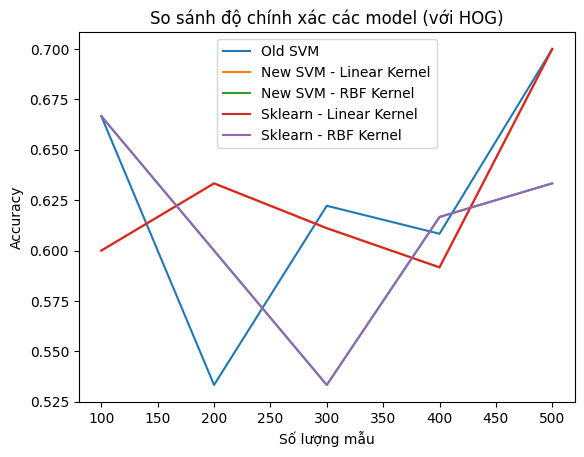

In [ ]:
plt.plot(n_test, acc1_hog, label = 'Old SVM')
plt.plot(n_test, acc2_hog, label = 'New SVM - Linear Kernel')
plt.plot(n_test, acc3_hog, label = 'New SVM - RBF Kernel')
plt.plot(n_test, acc4_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, acc5_hog, label = 'Sklearn - RBF Kernel')

plt.xlabel("Số lượng mẫu")
plt.ylabel("Accuracy")
plt.title("So sánh độ chính xác các model (với HOG)")
plt.legend()
plt.show()

**Nhận xét**

SVM bản cũ có accuracy thấp hơn trong hầu hết mọi trường hợp.

SVM mới có accuracy giống hoàn toàn với thư viện sklearn.

Kernel RBF kém ổn định hơn và thấp hơn linear khi số lượng mẫu thấp.


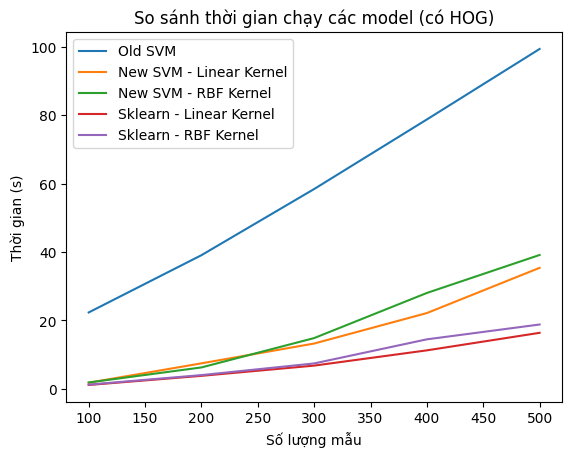

In [ ]:
plt.plot(n_test, time1_hog, label = 'Old SVM')
plt.plot(n_test, time2_hog, label = 'New SVM - Linear Kernel')
plt.plot(n_test, time3_hog, label = 'New SVM - RBF Kernel')
plt.plot(n_test, time4_hog, label = 'Sklearn - Linear Kernel')
plt.plot(n_test, time5_hog, label = 'Sklearn - RBF Kernel')

plt.xlabel("Số lượng mẫu")
plt.ylabel("Thời gian (s)")
plt.title("So sánh thời gian chạy các model (có HOG)")
plt.legend()
plt.show()

**Nhận xét**

SVM bản mới chạy nhanh hơn bản cũ (tính cả predict và fit).

SVM của sklearn chạy nhanh nhất nhưng không quá nhanh so với SVM bản mới.


# Thông số chi tiết kết quả

Do 2 biểu đồ trên bị trùng line của SVM mới và Sklearn, nên đây là bảng số liệu chi tiết về accuracy và time ở 2 trường hợp không HOG và HOG

In [ ]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "Old SVM Acc": acc1_no_hog, \
    "New SVM Linear Acc": acc2_no_hog, "New SVM RBF Acc": acc3_no_hog, \
        "Sklearn Linear Acc": acc4_no_hog, "Sklearn RBF Acc": acc5_no_hog})
df

,Số lượng mẫu,Old SVM Acc,New SVM Linear Acc,New SVM RBF Acc,Sklearn Linear Acc,Sklearn RBF Acc
0,100,0.466667,0.466667,0.600000,0.466667,0.600000
1,200,0.466667,0.483333,0.516667,0.483333,0.516667
2,300,0.500000,0.566667,0.555556,0.566667,0.555556
3,400,0.475000,0.483333,0.458333,0.483333,0.458333
4,500,0.553333,0.553333,0.520000,0.553333,0.520000


In [ ]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "Old SVM time(s)": time1_no_hog, \
    "New SVM Linear time(s)": time2_no_hog, "New SVM RBF time(s)": time3_no_hog, \
        "Sklearn Linear time(s)": time4_no_hog, "Sklearn RBF time(s)": time5_no_hog})
df

,Số lượng mẫu,Old SVM time(s),New SVM Linear time(s),New SVM RBF time(s),Sklearn Linear time(s),Sklearn RBF time(s)
0,100,135.146616,4.732021,7.239938,3.025063,4.086484
1,200,267.240547,19.324826,25.830749,11.508911,16.468155
2,300,457.667466,44.044991,56.301909,25.084051,36.519671
3,400,640.736955,84.974465,104.103791,43.554701,63.868066
4,500,801.964048,132.703005,159.945655,67.139914,98.675242


In [ ]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "Old SVM + hog Acc": acc1_hog, \
    "New SVM Linear + hog Acc": acc2_hog, "New SVM RBF + hog Acc": acc3_hog, \
        "Sklearn Linear + hog Acc": acc4_hog, "Sklearn RBF + hog Acc": acc5_hog})
df

,Số lượng mẫu,Old SVM + hog Acc,New SVM Linear + hog Acc,New SVM RBF + hog Acc,Sklearn Linear + hog Acc,Sklearn RBF + hog Acc
0,100,0.666667,0.600000,0.666667,0.600000,0.666667
1,200,0.533333,0.633333,0.600000,0.633333,0.600000
2,300,0.622222,0.611111,0.533333,0.611111,0.533333
3,400,0.608333,0.591667,0.616667,0.591667,0.616667
4,500,0.700000,0.700000,0.633333,0.700000,0.633333


In [ ]:
df = pd.DataFrame(data = {"Số lượng mẫu": n_test, "Old SVM + hog time(s)": time1_hog, \
    "New SVM Linear + hog time(s)": time2_hog, "New SVM RBF + hog time(s)": time3_hog, \
        "Sklearn Linear + hog time(s)": time4_hog, "Sklearn RBF + hog time(s)": time5_hog})
df

,Số lượng mẫu,Old SVM + hog time(s),New SVM Linear + hog time(s),New SVM RBF + hog time(s),Sklearn Linear + hog time(s),Sklearn RBF + hog time(s)
0,100,22.327771,1.797364,1.862747,1.137217,1.235330
1,200,39.054585,7.454898,6.261419,3.804493,4.022248
2,300,58.390160,13.246542,14.839530,6.793966,7.428957
3,400,78.717818,22.147994,28.020425,11.251351,14.470326
4,500,99.310966,35.363732,39.118518,16.373215,18.803543
